# CIS509: Group Project
Team X (421) <br>
Team Members: Bhumit, Anukriti, Ayush, Hannah and Ashwin



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# File paths for each dataset
reviews_path = '/content/drive/MyDrive/yelp_dataset/yelp_reviews_restaurant_category.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews_df = pd.read_csv(reviews_path)
reviews_df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",6_SpY41LIHZuIaiDs5FMKA,4.0,0.0,0.0,1.0,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",tCXElwhzekJEH6QJe3xs7Q,4.0,3.0,1.0,2.0,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",WqfKtI-aGMmvbA9pPUxNQQ,5.0,0.0,0.0,0.0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",3-1va0IQfK-9tUMzfHWfTA,5.0,5.0,0.0,5.0,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",EouCKoDfzaVG0klEgdDvCQ,4.0,2.0,1.0,1.0,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


## Executive Summary of the Project

In this project, we are focusing on extracting meaningful patterns and trends fom the business and review tables, primarily targetting restaurants in Arizona. We focus to help the restaurant understand more about the customer preferences. We will use sentiment analysis and topic extraction as well as focus on ML models like regression and classification.

## Data Sources

Data is sourced from the Yelp Data, available on [Yelp DataSet](https://www.yelp.com/dataset/download).<br><br>
As we know that the dataset is large, we used the other python file to convert the json files of reviews and business into one single csv file with certain filters for our ease. Link to the python file is [here](https://colab.research.google.com/drive/13HjUpweY73Ftp7_djOlMAE6EsQPkVKVM?usp=sharing).


## Summary Statistics of the Data

### Data Import and Data Types

In [ ]:
# Data Import/Export
# Reading data

reviews_df = pd.read_csv(reviews_path)
reviews_df.head(5)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# Data Exploration
# Quick Inspection

print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773772 entries, 0 to 3773771
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   business_id   object 
 1   name          object 
 2   address       object 
 3   city          object 
 4   state         object 
 5   postal_code   object 
 6   latitude      float64
 7   longitude     float64
 8   stars         float64
 9   attributes    object 
 10  categories    object 
 11  user_id       object 
 12  review_stars  float64
 13  useful        float64
 14  funny         float64
 15  cool          float64
 16  text          object 
 17  date          object 
dtypes: float64(7), object(11)
memory usage: 518.2+ MB
None


In [ ]:
p1= reviews_df['user_id'].value_counts()
p1

_BcWyKQL16ndpBdggh2kNA    1156
-G7Zkl1wIWBBmD0KRy_sCw    1038
fr1Hz2acAb3OaL3l6DyKNg     873
ET8n-r7glWYqZhuR6GcdNw     766
1HM81n6n4iPIFU5d2Lokhw     749
                          ... 
P1PjRVPP-PgmjG2t1Flbqw       1
sFyCddWRLVLzWPH696vh1w       1
TVQyMlPvZwonDTlfdLkfcw       1
e2avYrTeFZ6Avhu69V_g-Q       1
eWz12w7dzYlfrGnhTQ82Fg       1
Name: user_id, Length: 1277289, dtype: int64

### Finding the most popular reviewers

In [ ]:
reviews_df['number_of_reviews'] = reviews_df.groupby('user_id')['user_id'].transform('count')

# Now, select the 'stars' and 'number_of_reviews' columns and describe them
n = reviews_df[['review_stars', 'number_of_reviews']].describe()

print(n)

#filter only the ones who have more than 2 reviews as 75% of the users have given 2.1 reviews

       review_stars  number_of_reviews
count  3.773770e+06       3.773770e+06
mean   3.831686e+00       2.612460e+01
std    1.386410e+00       6.544903e+01
min    1.000000e+00       1.000000e+00
25%    3.000000e+00       2.000000e+00
50%    4.000000e+00       6.000000e+00
75%    5.000000e+00       2.100000e+01
max    5.000000e+00       1.156000e+03


In [ ]:
#total number of unique reviewers
len(reviews_df['user_id'].unique())

1277290

In [ ]:
p = reviews_df[['user_id','review_stars']].groupby('user_id').count()
p

,review_stars
user_id,
---2PmXbF47D870stH1jqA,16
---UgP94gokyCDuB5zUssA,9
---r61b7EpVPkb4UVme5tA,2
---zemaUC8WeJeWKqS6p9Q,1
--0DrQkM0FT-yCQRWw82uQ,1
...,...
zzz-M4QvkEpUWWPL9RTzLA,2
zzzCg-_lpyYE82TlJCdwdw,1
zzzGgfvrSJ4AQeKtcgocIw,1


In [ ]:
m = reviews_df[['user_id','review_stars']].groupby('user_id').mean()
m

,review_stars
user_id,
---2PmXbF47D870stH1jqA,5.000000
---UgP94gokyCDuB5zUssA,3.666667
---r61b7EpVPkb4UVme5tA,2.500000
---zemaUC8WeJeWKqS6p9Q,5.000000
--0DrQkM0FT-yCQRWw82uQ,1.000000
...,...
zzz-M4QvkEpUWWPL9RTzLA,1.500000
zzzCg-_lpyYE82TlJCdwdw,5.000000
zzzGgfvrSJ4AQeKtcgocIw,3.000000


In [ ]:
n=m.reset_index()
p1=p.reset_index()

In [ ]:
p1

,user_id,review_stars
0,---2PmXbF47D870stH1jqA,16
1,---UgP94gokyCDuB5zUssA,9
2,---r61b7EpVPkb4UVme5tA,2
3,---zemaUC8WeJeWKqS6p9Q,1
4,--0DrQkM0FT-yCQRWw82uQ,1
...,...,...
1277284,zzz-M4QvkEpUWWPL9RTzLA,2
1277285,zzzCg-_lpyYE82TlJCdwdw,1
1277286,zzzGgfvrSJ4AQeKtcgocIw,1
1277287,zzzMBVS73g3ZJ7qL8JyhiA,1


In [ ]:
n['number_of_reviews']=p1['review_stars']
n

,user_id,review_stars,number_of_reviews
0,---2PmXbF47D870stH1jqA,5.000000,16
1,---UgP94gokyCDuB5zUssA,3.666667,9
2,---r61b7EpVPkb4UVme5tA,2.500000,2
3,---zemaUC8WeJeWKqS6p9Q,5.000000,1
4,--0DrQkM0FT-yCQRWw82uQ,1.000000,1
...,...,...,...
1277284,zzz-M4QvkEpUWWPL9RTzLA,1.500000,2
1277285,zzzCg-_lpyYE82TlJCdwdw,5.000000,1
1277286,zzzGgfvrSJ4AQeKtcgocIw,3.000000,1
1277287,zzzMBVS73g3ZJ7qL8JyhiA,1.000000,1


In [ ]:
mp_reviewers = n[n['number_of_reviews'] > 4]
mp_reviewers

,user_id,review_stars,number_of_reviews
0,---2PmXbF47D870stH1jqA,5.000000,16
1,---UgP94gokyCDuB5zUssA,3.666667,9
17,--2bpE5vyR-2hAP7sZZ4lA,4.500000,6
26,--3WaS23LcIXtxyFULJHTA,4.000000,5
30,--4AjktZiHowEIBCMd4CZA,4.500000,12
...,...,...,...
1277219,zziWJMYwDjyVi7kJmgRUvg,3.875000,8
1277252,zzqVInn9-mjoj7diZLFNkQ,4.571429,14
1277258,zzsPf8xNW11nd0B6MZqfRw,4.500000,10
1277265,zztkCqqgR6VntYbqio4UTQ,4.147059,34


In [ ]:
filtered_users = n[n['number_of_reviews'] > 2]
filtered_users

,user_id,review_stars,number_of_reviews
0,---2PmXbF47D870stH1jqA,5.000000,16
1,---UgP94gokyCDuB5zUssA,3.666667,9
8,--17Db1K-KujRuN7hY9Z0Q,4.666667,3
17,--2bpE5vyR-2hAP7sZZ4lA,4.500000,6
20,--2vR0DIsmQ6WfcSzKWigw,4.333333,3
...,...,...,...
1277265,zztkCqqgR6VntYbqio4UTQ,4.147059,34
1277270,zzvCl_egPyWpxO7EvWc2IA,4.333333,3
1277271,zzvc3LXTK2WLyZPECI3apw,5.000000,4
1277272,zzw0Z6-_VDp9ShIRSKIsQw,3.857143,14


### Maximum Number of Restaurant in each city of State of AZ

In [ ]:
df1= reviews_df[reviews_df['state']== 'AZ']
df1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,categories,user_id,review_stars,useful,funny,cool,text,date,number_of_reviews
3788,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",q44_w_oVQg698KWPlKw7XA,5.0,0.0,0.0,0.0,Just tried Papa Murphy's for first time last n...,2015-11-20 16:32:27,3.0
3789,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",cZtDleoAeanFLmsUc4zdDg,5.0,0.0,0.0,0.0,Delicious and fresh. Recommend for a party or ...,2018-02-04 22:24:29,1.0
3790,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",AWSvGe4eGZJIns5MUxvsZQ,5.0,0.0,0.0,0.0,Today my sister and I received excellent custo...,2015-07-30 01:26:19,1.0
3791,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",_rvtejG1xx6ALnpx77xjlw,5.0,1.0,0.0,0.0,I have been to all of the papa Murphy's in the...,2012-05-06 16:34:49,9.0
3792,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741,32.338572,-111.010760,4.0,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",VJDBpYUc-ijCl_UmFh2h-Q,4.0,4.0,0.0,0.0,This has become one of our favorite places to ...,2010-01-31 21:13:51,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772482,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,AZ,85701,32.221828,-110.967969,3.5,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...",cMMAuCeIQKYpxGkaSTxJqA,3.0,4.0,0.0,2.0,"I was really excited to try this place out, bu...",2015-10-26 21:49:11,66.0
3772483,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,AZ,85701,32.221828,-110.967969,3.5,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...",CoTVSf0g_OJ363aJNTwFXA,4.0,1.0,0.0,0.0,Came here with a friend to try the renowned pe...,2021-01-10 19:19:58,2.0
3772484,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,AZ,85701,32.221828,-110.967969,3.5,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...",nATwGyVFLrzBRoJzLKWBuQ,5.0,2.0,0.0,0.0,This bar definitely stands out from other down...,2017-06-13 22:43:10,61.0
3772485,IeSD0nMKRFYUTnR5nZH1CQ,HighWire Lounge,14 S Arizona Ave,Tucson,AZ,85701,32.221828,-110.967969,3.5,"{'BusinessParking': ""{'garage': False, 'street...","Bars, Tapas Bars, Restaurants, Nightlife, Gast...",ZV5YqHrS0PktUTLT-F0s4w,3.0,0.0,1.0,0.0,"This place is strange/interesting, since it's ...",2019-01-03 19:37:44,22.0


In [ ]:
df1.to_csv("yelp_reviews_restaurant_category_az.csv", index=False)

In [ ]:
df12 = pd.DataFrame(df1['city'].value_counts())
df12.reset_index(inplace=True)
df12.rename(columns={'index':'city','city':'number of restuarants'}, inplace = True)

### Highest Reviewed Restaurants

In [ ]:
#Highest reviewed restaurant overall
l = reviews_df['name'].value_counts()[:20]
print(l)
z = df1['name'].value_counts()[:20]
print(z)

McDonald's                            17309
Chipotle Mexican Grill                 9438
First Watch                            9076
Acme Oyster House                      8461
Taco Bell                              8320
Chick-fil-A                            8315
Oceana Grill                           7516
Buffalo Wild Wings                     7063
Panera Bread                           6906
Domino's Pizza                         6335
Hattie B’s Hot Chicken - Nashville     6160
Wendy's                                6151
Chili's                                5999
Ruby Slipper Cafe                      5882
Reading Terminal Market                5778
Applebee's Grill + Bar                 5704
IHOP                                   5669
Outback Steakhouse                     5655
Texas Roadhouse                        5362
Ruby Slipper - New Orleans             5264
Name: name, dtype: int64
El Charro Cafe                   2531
Prep & Pastry                    2230
El Guero Canelo    

### Geographical Locations of Restaurants on Graph

In [ ]:
gl = df1[['name','city','latitude','longitude']].drop_duplicates()
gl

,name,city,latitude,longitude
3788,Papa Murphy's,Tucson,32.338572,-111.010760
3989,Home Plate Sports Pub,Tucson,32.206315,-110.887843
9219,Rosati's Pizza,Tucson,32.338724,-111.030310
10240,Sher-e-Punjab,Tucson,32.250960,-110.959158
14418,La Bella China Restaurant,Tucson,32.149473,-110.978186
...,...,...,...,...
3764496,Jack in the Box,Tucson,32.287556,-110.960460
3765130,Risky Business,Tucson,32.257496,-110.803966
3765871,Alloro D.O.C.,Tucson,32.219594,-110.830286
3770570,The Station Pub & Grill,Tucson,32.356266,-111.112350


### City with Most Businesses (Graph)

(Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Latitude'))

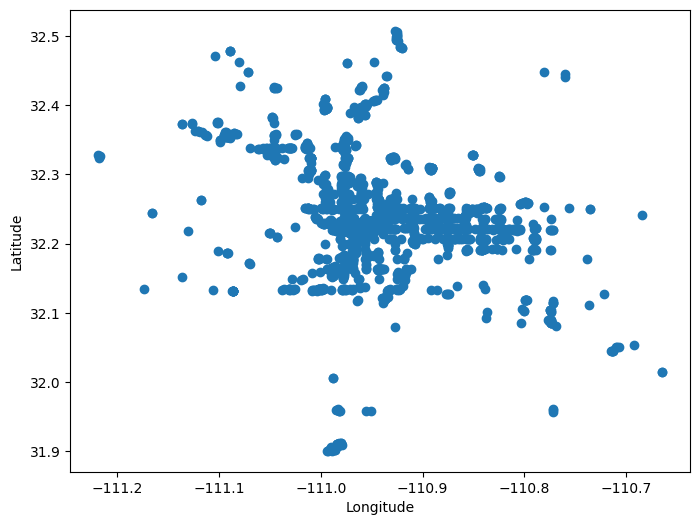

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(gl.longitude, gl.latitude)
plt.xlabel('Longitude'), plt.ylabel('Latitude')

### Relationship between Number of Reviews and Review_Stars

([<matplotlib.axis.YTick at 0x7fd7689f2470>,
 [Text(0, 0, 'Tucson'),
  Text(0, 1, 'Oro Valley'),
  Text(0, 2, 'Marana'),
  Text(0, 3, 'Green Valley'),
  Text(0, 4, 'Sahuarita'),
  Text(0, 5, 'Catalina'),
  Text(0, 6, 'Vail'),
  Text(0, 7, 'Mount Lemmon'),
  Text(0, 8, 'Tuscon'),
  Text(0, 9, 'Corona De Tucson')])

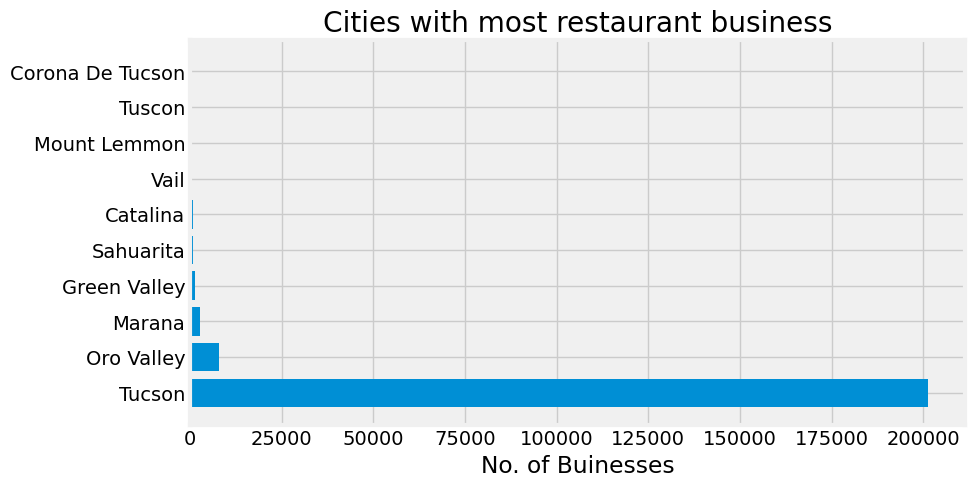

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
barlist = plt.barh(range(10),df12['number of restuarants'][:10])
#barlist[4]= set.color('crimson') #understand how to add this
plt.title('Cities with most restaurant business')
plt.xlabel('No. of Buinesses')
plt.yticks(range(10),df12['city'][:10])

In [ ]:
len(df12['city'].unique())

15

In [ ]:
#drop rows with NaN reviews
df1.dropna(subset=['text'], inplace=True, axis=0)


<ipython-input-27-cbd4415d80f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['text'], inplace=True, axis=0)


In [ ]:
#new column to find the length of the review text
df1['text_length']= df1['text'].apply(len)

<ipython-input-28-3b144bf5845b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_length']= df1['text'].apply(len)


In [ ]:
#Total number of restuarants
a = df1['name'].unique()
print("Total number of restaurants", len(a))

Total number of restaurants 1159


### Pie-Chart for Type of reviews for AZ State

In [ ]:
#overview of type of reviews

useful_reviews = len(df1[df1["useful"]>0])
cool_reviews = len(df1[df1["cool"]>0])
funny_reviews = len(df1[df1["funny"]>0])
negative_reviews= len(df1[df1["stars"]<=2])
positive_reviews =len(df1[df1 ["stars"] >=3])
total_reviews = len(df1)

print("Total reviews:{}".format(total_reviews))
print("Useful reviews:{}".format(useful_reviews))
print("Funny reviews:{}".format(funny_reviews))
print("Cool reviews:{}".format(cool_reviews))
print("Total negative reviews:{}".format(negative_reviews))
print("Total positive reviews:{}".format(positive_reviews))

Total reviews:216409
Useful reviews:100700
Funny reviews:35805
Cool reviews:51713
Total negative reviews:5848
Total positive reviews:200750


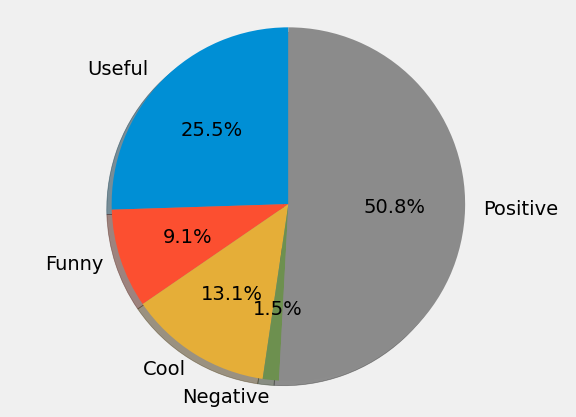

In [ ]:
#overview of reviews as a pie-chart
import matplotlib.pyplot as plt
labels = ["Useful", "Funny", "Cool", "Negative", "Positive"]
sizes = [useful_reviews, funny_reviews, cool_reviews, negative_reviews, positive_reviews]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal")
plt.show()

### Statistical Analysis

In [ ]:
from scipy.stats import ks_2samp

# Extract the relevant columns
text_length = df1['text_length']
review_count = filtered_users['number_of_reviews']

# Perform the Kolmogorov-Smirnov test
statistic, pvalue = ks_2samp(text_length, review_count)

# Print the results
print("KS statistic:", statistic)
print("p-value:", pvalue)

#p value is less than 0.5 so both the columns have different distribution

KS statistic: 0.98587381339752
p-value: 0.0


In [ ]:
# Extract the relevant columns
stars = df1['review_stars']
text_length = df1['text_length']

# Perform the Kolmogorov-Smirnov test
statistic, pvalue = ks_2samp(stars, text_length, mode='asymp')

# Print the results
print("KS statistic:", statistic)
print("p-value:", pvalue)

#p value is less than 0.5, so both the columns have different distribution

KS statistic: 0.9999768956004602
p-value: 0.0


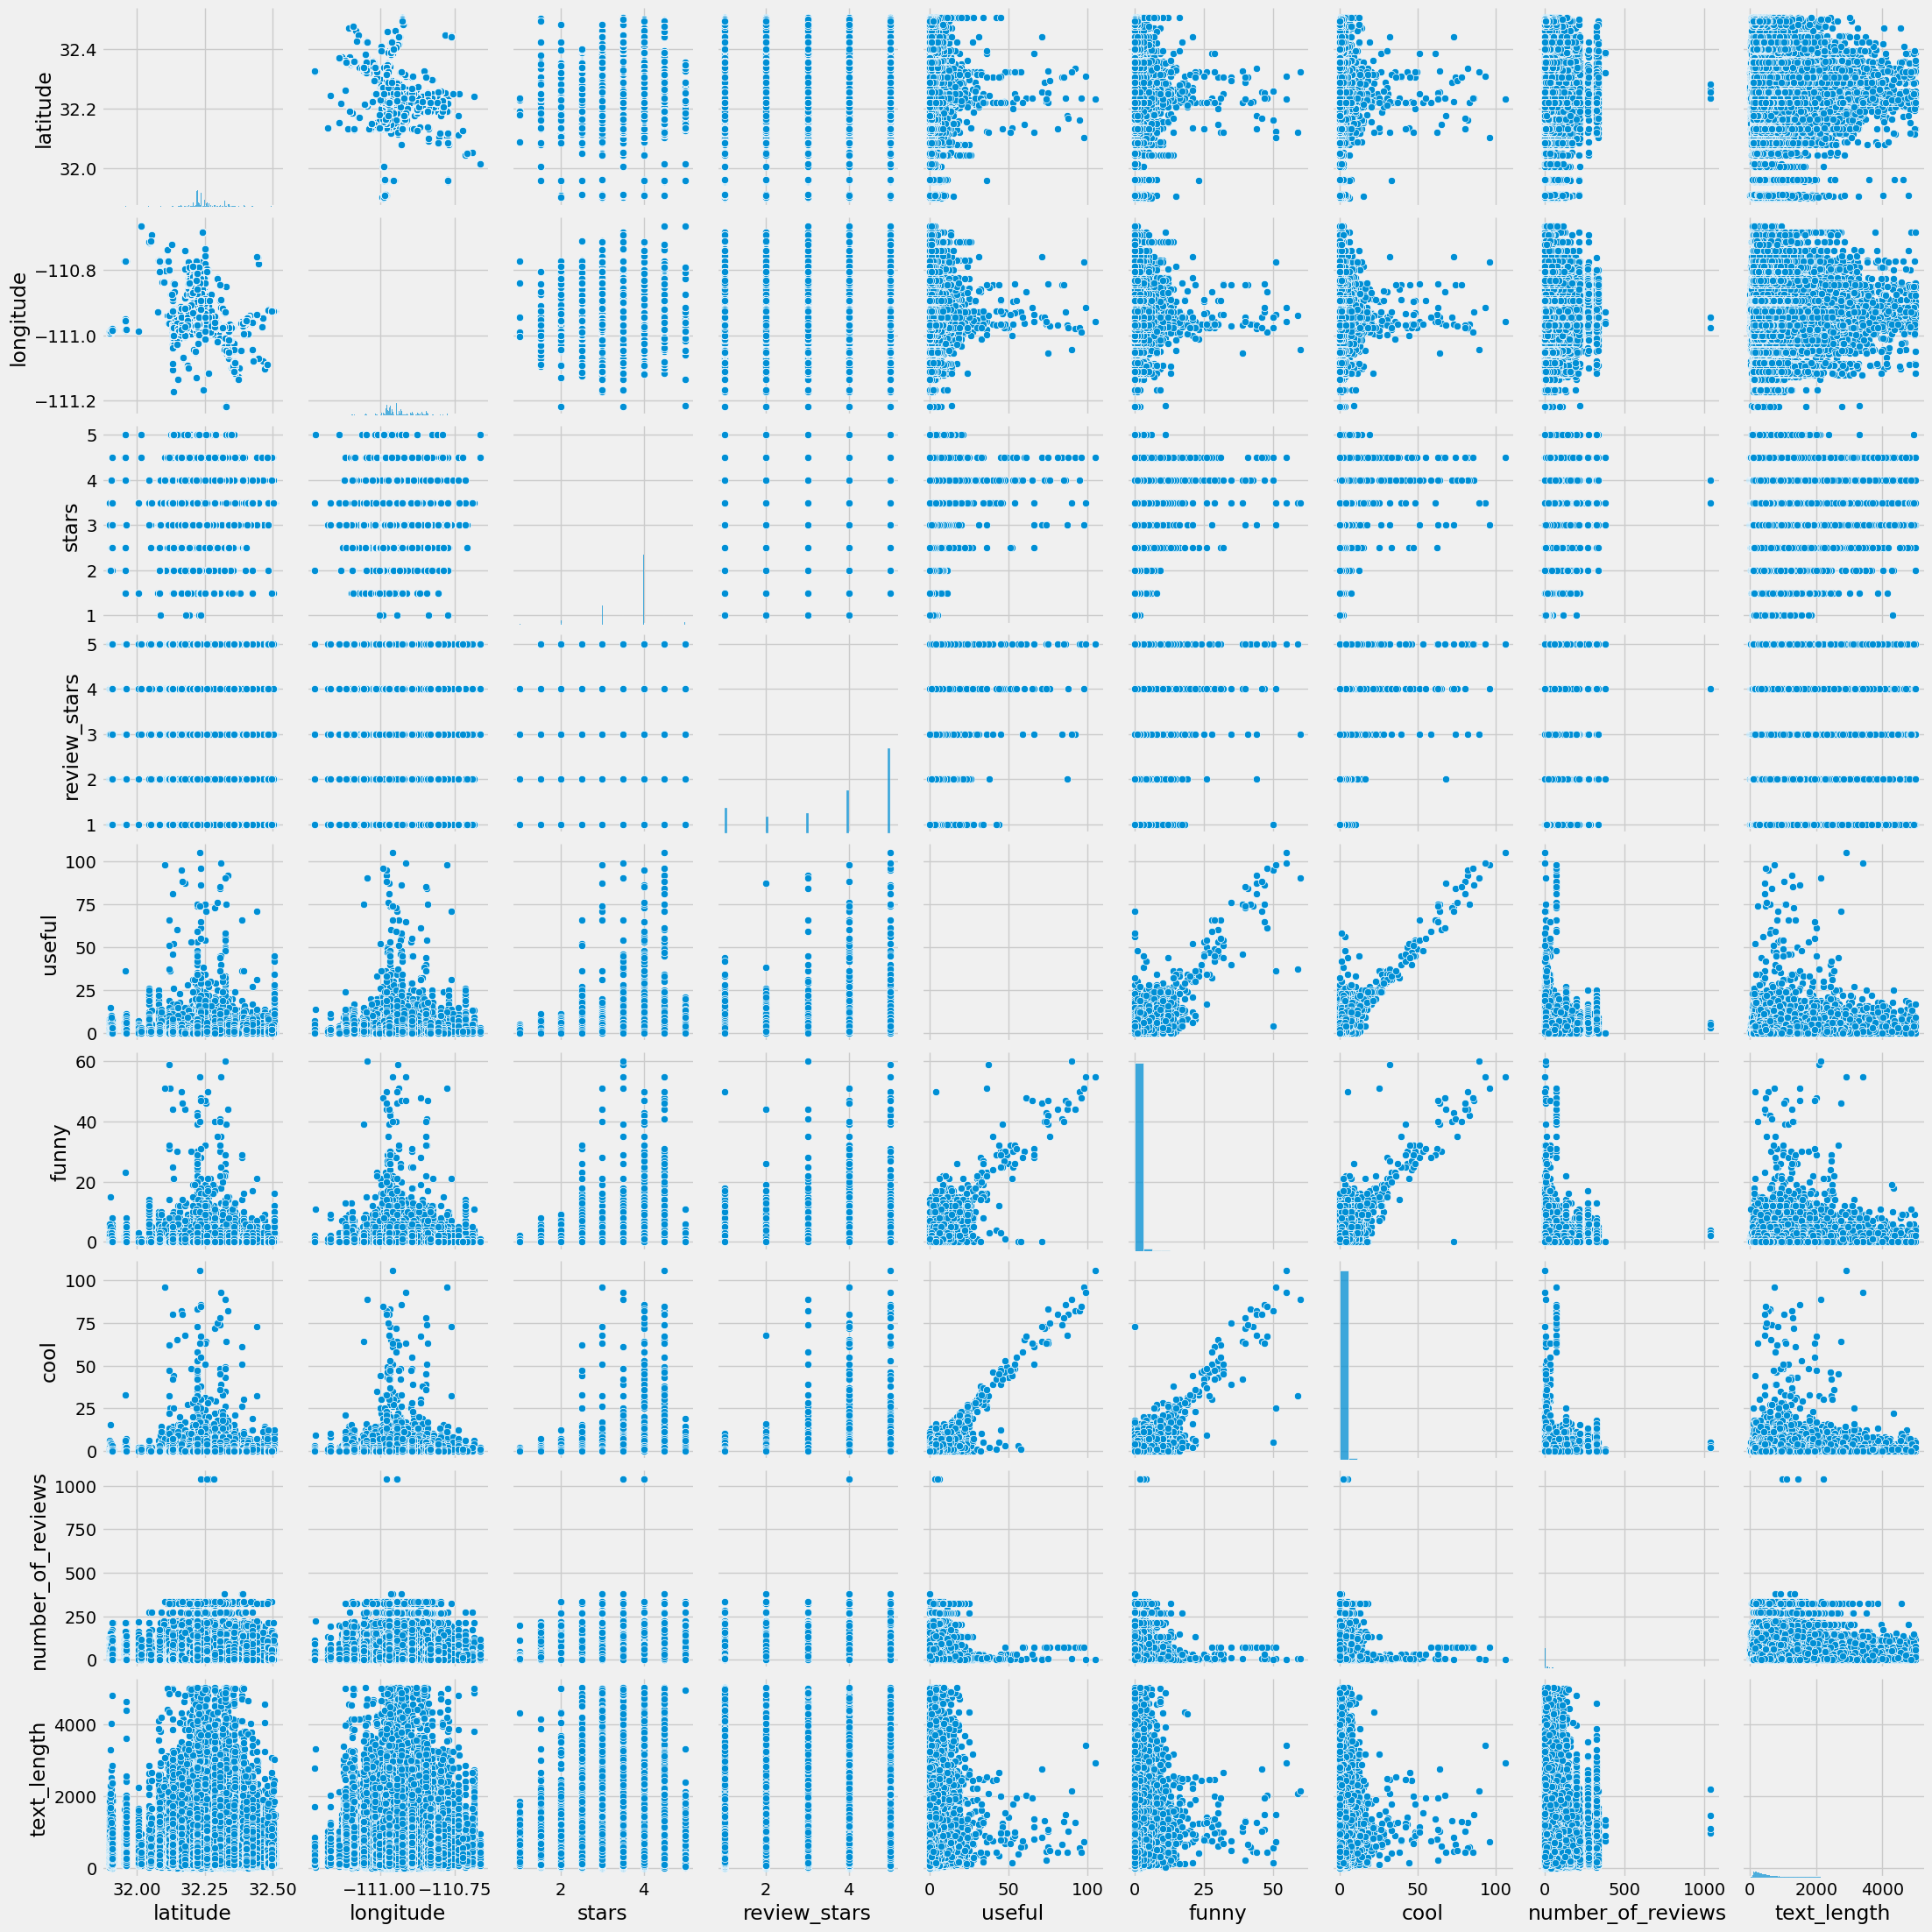

In [ ]:
import seaborn as sns
sns.pairplot(df1)

In [ ]:
#introducing a new column to identify good reviewed restaurant(holds binary value)
df1['good_reviewed_restaurant']=10
for i in df1.index:
  df1['good_reviewed_restaurant'][i]=df1['review_stars'][i]>=3


<ipython-input-34-db32633022b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['good_reviewed_restaurant']=10
<ipython-input-34-db32633022b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['good_reviewed_restaurant'][i]=df1['review_stars'][i]>=3


In [ ]:
print(df1['good_reviewed_restaurant'])
df1['good_reviewed_restaurant'].replace({True:1, False:0}, inplace= True)
print(df1['good_reviewed_restaurant'])

3788       True
3789       True
3790       True
3791       True
3792       True
           ... 
3772482    True
3772483    True
3772484    True
3772485    True
3772486    True
Name: good_reviewed_restaurant, Length: 216409, dtype: object
3788       1
3789       1
3790       1
3791       1
3792       1
          ..
3772482    1
3772483    1
3772484    1
3772485    1
3772486    1
Name: good_reviewed_restaurant, Length: 216409, dtype: int64


<ipython-input-35-bdfe00b7aae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['good_reviewed_restaurant'].replace({True:1, False:0}, inplace= True)


In [ ]:
#top reviewed restaurants are
top_reviewed = df1[df1["review_stars"]>=3]['name'].unique()
top_reviewed

array(["Papa Murphy's", 'Home Plate Sports Pub', "Rosati's Pizza", ...,
       'Alloro D.O.C.', 'The Station Pub & Grill', 'HighWire Lounge'],
      dtype=object)

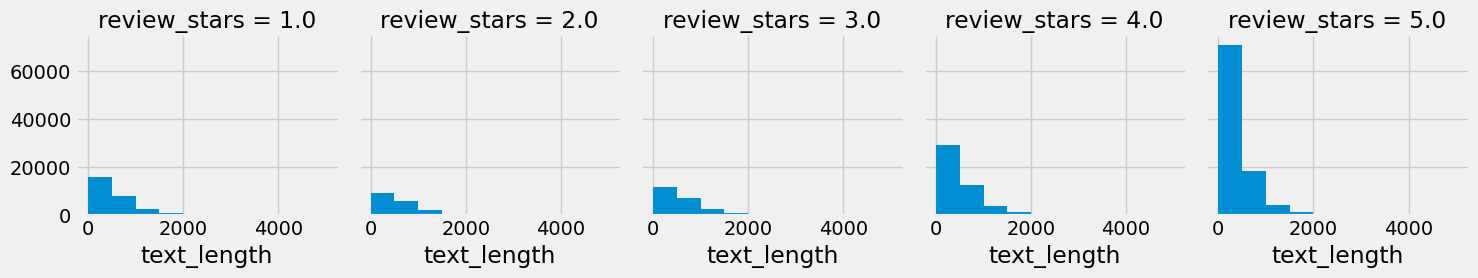

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df1,col='review_stars')
g.map(plt.hist,'text_length')

# Since the pattern is the same, we can conclude that the quantity does not matter, but quality does matter
#text length ranges between 0 to 2000.

<ipython-input-39-3e729952adc8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_stars', y='text_length', data=df1, palette ='rainbow')


<Axes: xlabel='review_stars', ylabel='text_length'>

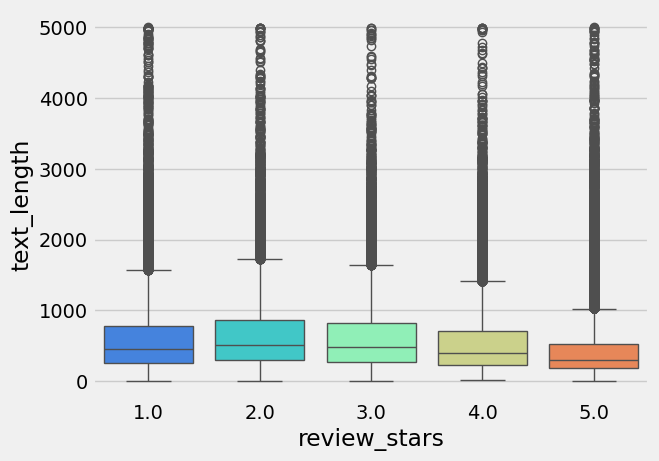

In [ ]:
#boxplot of text_length for each star rating
#shows the skewness as in shown from the above hsitogram as well

sns.boxplot(x='review_stars', y='text_length', data=df1, palette ='rainbow')

In [ ]:
df1.corr()

<ipython-input-40-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,latitude,longitude,stars,review_stars,useful,funny,cool,number_of_reviews,text_length,good_reviewed_restaurant
latitude,1.000000,-0.315963,0.053634,0.028145,0.006770,-0.011870,-0.001057,-0.002174,0.021183,0.021381
longitude,-0.315963,1.000000,-0.012580,-0.005950,-0.002631,-0.007842,-0.007280,0.018243,0.005552,-0.005655
stars,0.053634,-0.012580,1.000000,0.406061,0.016280,-0.002410,0.081173,0.006520,-0.031808,0.357003
review_stars,0.028145,-0.005950,0.406061,1.000000,-0.092986,-0.072639,0.099549,0.021095,-0.179186,0.881669
useful,0.006770,-0.002631,0.016280,-0.092986,1.000000,0.676159,0.759154,0.188047,0.292039,-0.092463
funny,-0.011870,-0.007842,-0.002410,-0.072639,0.676159,1.000000,0.722837,0.099897,0.207575,-0.064628
cool,-0.001057,-0.007280,0.081173,0.099549,0.759154,0.722837,1.000000,0.163867,0.173718,0.095765
number_of_reviews,-0.002174,0.018243,0.006520,0.021095,0.188047,0.099897,0.163867,1.000000,0.165026,0.095477
text_length,0.021183,0.005552,-0.031808,-0.179186,0.292039,0.207575,0.173718,0.165026,1.000000,-0.135395
good_reviewed_restaurant,0.021381,-0.005655,0.357003,0.881669,-0.092463,-0.064628,0.095765,0.095477,-0.135395,1.000000


<ipython-input-41-b9e7397a5c3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap='coolwarm', annot = True)


<Axes: >

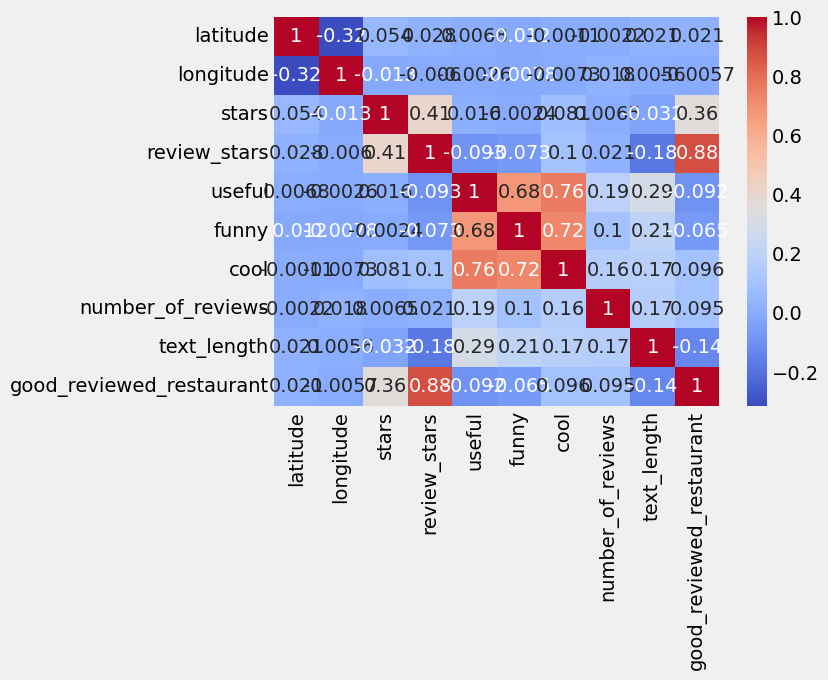

In [ ]:
sns.heatmap(df1.corr(), cmap='coolwarm', annot = True)

Looking at the matrix:

1. good_reviewed_restaurant seems to have a strong positive correlation (0.881669) with stars, suggesting that higher star ratings are associated with good reviews of the restaurant.<br>
2. good_reviewed_restaurant has a negative correlation with text_length (-0.135395), which might suggest that longer text reviews are less associated with good reviews, although this relationship is not very strong.<br>
3. The cool variable has strong positive correlations with useful and funny, which could mean that reviews marked as 'cool' are often also marked as 'useful' and 'funny'.

## Data Evaluation
Comment on data quality by answering the following questions:<br>


a. The selected data is based on the state of Arizona and the businesses of restaurants which are open. Hence the dataframe df1 helps us in answering how customers have rated and reviewed these restaurants and how can we make a recommendation ahead.<br>
b. The sample size is enough for sentimental analysis, we have around 216409 rows. <br>
c. One of the potential challenges we faced was to extarct the meaningful data from the reviews.json and business.json and filter it out and make another csv for further analysis, once that part was done, we were in pretty good shape to move ahead with our analysis<br>
d. I didnt see any bias in the dataset, except one which was that all the cities in the State of Arizona were from South Arizona, still trying to figure that out.

## Preliminary Data Exploration
Apply topic modeling on the textual data for
your project to understand the major topics and briefly comment on the results.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Assuming df is your DataFrame and it has a column named 'text' with the text data

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing
df1['preprocessed_text'] = df1['text'].apply(preprocess_text)

# Vectorize the text
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df1['preprocessed_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust n_components as needed
lda.fit(dtm)

# Display the topics
words = vectorizer.get_feature_names_out()
topics = lda.components_
top_words = 10  # Adjust the number of top words per topic as needed

for topic_idx, topic in enumerate(topics):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-top_words - 1:-1]]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-8-08eb1715208e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['preprocessed_text'] = df1['text'].apply(preprocess_text)


Topic 1:
food great place good service tucson restaurant always friendly time
Topic 2:
pizza place good sandwich coffee like great bread one salad
Topic 3:
food time order service get one back minute table would
Topic 4:
good taco ordered chicken sauce food salsa like dish flavor
Topic 5:
burger good fry place like food get cheese egg breakfast


The output of the Latent Dirichlet Allocation (LDA) model has given us five distinct topics based on the text data from reviews. Each topic is characterized by a set of keywords that highlight the main themes or subjects present in the dataset. Here’s a brief commentary on each topic based on the keywords provided:

1. **Topic 1: General Dining Experience**
   - Keywords: food, great, place, good, service, Tucson, restaurant, always, friendly, time
   - Commentary: This topic appears to focus on the overall dining experience at various establishments, possibly within Tucson. The emphasis on "great," "good," "friendly," and "service" suggests positive experiences. "Always" might indicate repeat visits or consistency in quality.

2. **Topic 2: Specific Food Items and Casual Dining**
   - Keywords: pizza, place, good, sandwich, coffee, like, great, bread, one, salad
   - Commentary: The emphasis here is on specific types of casual dining options such as pizza, sandwiches, and coffee. The mention of "bread" and "salad" also points to a focus on cafes or bistros. The overall sentiment appears positive, highlighting the quality ("good," "great") of these items.

3. **Topic 3: Service and Wait Times**
   - Keywords: food, time, order, service, get, one, back, minute, table, would
   - Commentary: This topic seems to revolve around the service aspect of dining, including order and wait times ("minute," "time," "order"). Words like "back" and "table" might refer to returning to the establishment or waiting for a table. The inclusion of "would" could imply conditional experiences or expectations.

4. **Topic 4: Specific Dishes and Flavors**
   - Keywords: good, taco, ordered, chicken, sauce, food, salsa, like, dish, flavor
   - Commentary: Here, the focus is on specific dishes and their flavors, with a strong emphasis on Mexican or similar cuisines ("taco," "chicken," "sauce," "salsa"). "Ordered" and "dish" suggest a detailed discussion of menu items and their taste profiles ("flavor").

5. **Topic 5: American Breakfast and Fast Food**
   - Keywords: burger, good, fry, place, like, food, get, cheese, egg, breakfast
   - Commentary: The fifth topic targets American dining staples, particularly around breakfast and fast food options ("burger," "fry," "cheese," "egg," "breakfast"). The presence of "good" and "like" indicates favorable reviews of these foods.

**Overall Observation:**
The LDA model has effectively grouped the reviews into meaningful topics that cover a wide range of dining experiences, from the general ambiance and service to specific food items and cuisines. The positive adjectives spread across the topics suggest that the reviews are generally favorable. These topics can help in understanding customer preferences and areas of interest, which can be valuable for businesses looking to improve or market their services. Additionally, the specificity of some topics (like Topic 4 on Mexican cuisine and Topic 5 on breakfast items) provides insight into particular areas that might be drawing significant customer interest or satisfaction.

## Proposed Solution
Describe what relevant machine learning and unstructured
data analytics methods you plan to use for the project.<br>

a)**Regression Analysis:** Linear and logistic regression models will predict factors influencing business openings and closings, and user ratings.<br>
b)**Classification Models**: Using Naive Bayes, Random Forest, Decision Tree, and KNN algorithms to predict user behaviorss based on review texts.<br>
c)**Clustering Analysis:** Employing K-means clustering to identify patterns in business locations and review behaviors, focusing on reviews versus star ratings and geographical distribution.

